In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from os import error

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from scipy.stats import pearsonr, spearmanr
from tensorflow import keras 
from datetime import datetime

In [2]:
# Loading the csv data to a Pandas DataFrame
gold_data = pd.read_csv('/workspaces/Gold-Price-Prediction/Version 1/gld_price_data.csv')

In [3]:
# Print first 5 rows in the dataframe
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
# Print last 5 rows in the dataframe
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
# Number of rows and columns
gold_data.shape

(2290, 6)

In [6]:
# Getting some basic information about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
# Checking the number of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [8]:
# Getting the statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [9]:
# Checking for correlation
correlation = gold_data.drop(['Date'], axis=1).corr()

<Axes: >

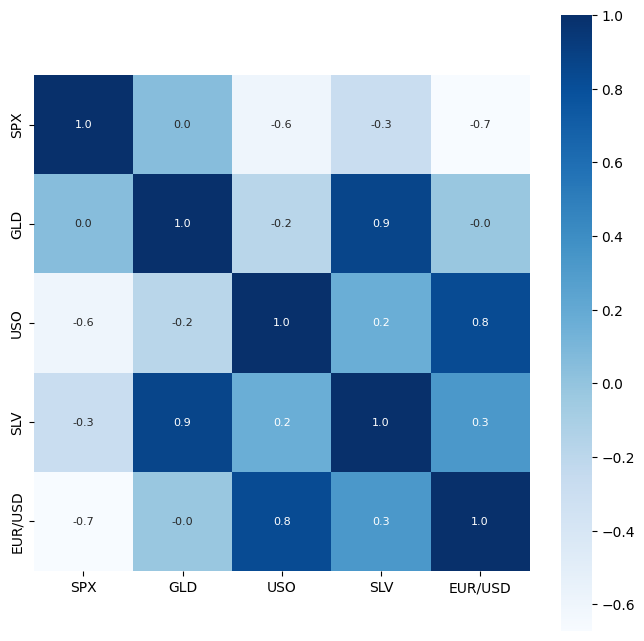

In [10]:
# Constructing heatmap to understand the correlation
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [11]:
# Checking correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<Axes: xlabel='GLD', ylabel='Count'>

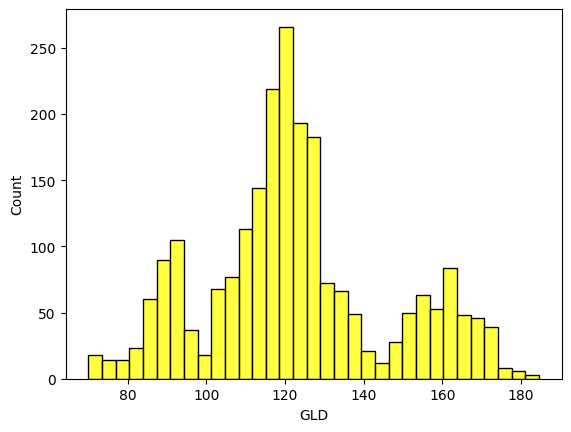

In [12]:
# Checking the distribution of the GLD Price
sns.histplot(gold_data['GLD'], color='yellow')

In [13]:
# Convert the Data into Date time then create a date filter
gold_data['Date'] = pd.to_datetime(gold_data['Date'])

In [14]:
prediction = gold_data.loc[
    (gold_data['Date'] > datetime(2013,1,1)) &
    (gold_data['Date'] < datetime(2018,1,1))
]

Text(0.5, 1.0, 'Price over time')

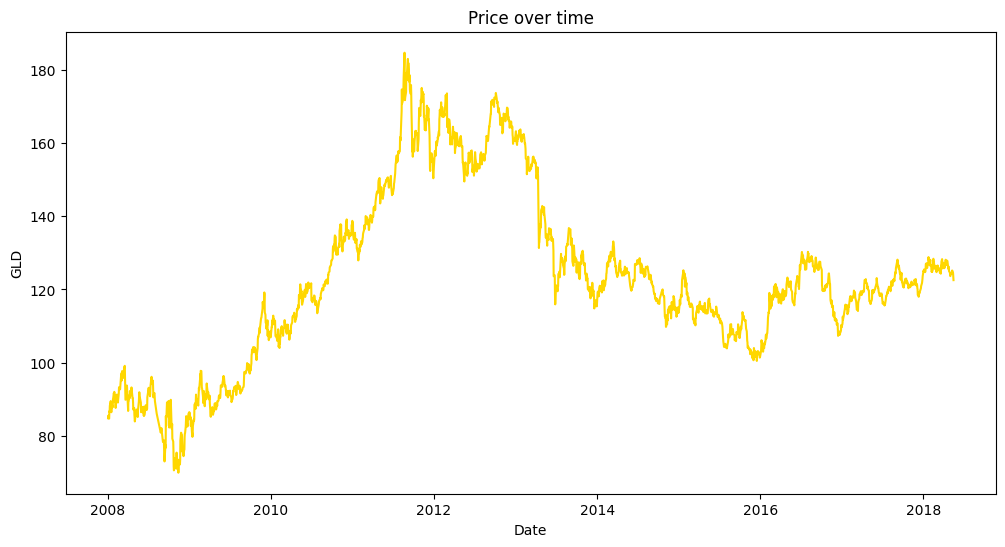

In [15]:
plt.figure(figsize=(12,6))
plt.plot(gold_data['Date'], gold_data['GLD'],color="gold")
plt.xlabel("Date")
plt.ylabel("GLD")
plt.title("Price over time")

In [16]:
# Prepare for the LSTM Model (Sequential)
stock_gold = gold_data.filter(["GLD"])
dataset = stock_gold.values #convert to numpy array
training_data_len = int(np.ceil(len(dataset) * 0.95))

In [17]:
# Preprocessing Stages
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

training_data = scaled_data[:training_data_len] #95% of all out data

X_train, y_train = [], []

In [18]:
# Create a sliding window for our stock (60 days)
for i in range(60, len(training_data)):
    X_train.append(training_data[i-60:i, 0])
    y_train.append(training_data[i,0])
    
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [19]:
# Build the Model
model = keras.models.Sequential()

In [20]:
# First Layer
model.add(keras.layers.LSTM(64, return_sequences=True, input_shape=(X_train.shape[1],1)))

2025-12-05 12:17:02.917634: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [21]:
# Second Layer
model.add(keras.layers.LSTM(16, return_sequences=False))

In [22]:
# Third Layer (Dense)
model.add(keras.layers.Dense(64, activation="relu"))

In [23]:
# Fourth Layer (Dropout)
model.add(keras.layers.Dropout(0.5))

In [24]:
# Final Output Layer
model.add(keras.layers.Dense(1))

In [25]:
model.summary()
model.compile(optimizer="adam",
              loss="mse",
              metrics=[keras.metrics.RootMeanSquaredError()])

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 16)             │         5,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,233 (90.75 KB)

 Trainable params: 23,233 (90.75 KB)

 Non-trainable params: 0 (0.00 B)

In [60]:
training = model.fit(X_train, y_train, epochs=10, batch_size=53)

Epoch 1/10


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0021 - root_mean_squared_error: 0.0454
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0019 - root_mean_squared_error: 0.0432
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0022 - root_mean_squared_error: 0.0465
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0019 - root_mean_squared_error: 0.0439
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0020 - root_mean_squared_error: 0.0451
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0020 - root_mean_squared_error: 0.0447
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0018 - root_mean_squared_error: 0.0422
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0020 - root_mean_squared_error: 0.0449
Epoch 9/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0020 - root_mean_squared_error: 0.0445
Epoch 10/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0019 - root_mean_squared_error: 0.0439


In [61]:
# Prep the test data
test_data = scaled_data[training_data_len - 60:]
X_test, y_test = [], dataset[training_data_len:]

y_test = y_test.reshape(-1)

In [62]:
for i in range(60, len(test_data)):
    X_test.append(test_data[i-60:i, 0])

In [63]:
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1 ))

In [64]:
# Make a Prediction
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions.reshape(-1,1))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [65]:
# Plotting data
train = gold_data[:training_data_len]
test =  gold_data[training_data_len:]

In [66]:
test = test.copy()

In [67]:
test['Predictions'] = predictions

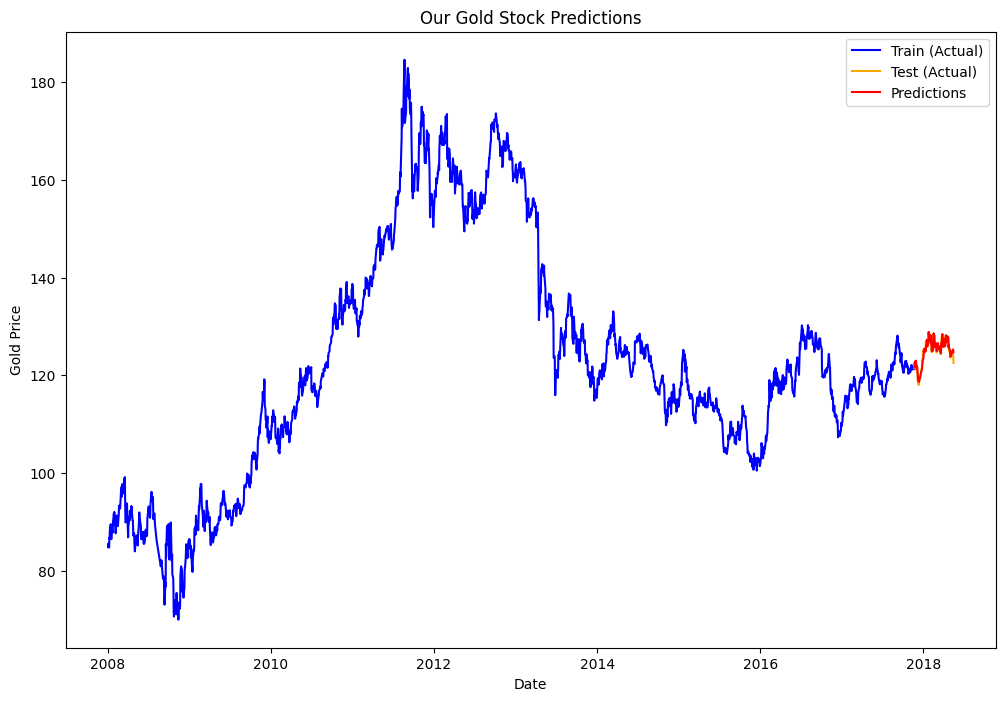

In [68]:
plt.figure(figsize=(12,8))
plt.plot(train['Date'], train['GLD'], label="Train (Actual)", color='blue')
plt.plot(test['Date'], test['GLD'], label="Test (Actual)", color='orange')
plt.plot(test['Date'], test['Predictions'], label="Predictions", color='red')
plt.title("Our Gold Stock Predictions")
plt.xlabel("Date")
plt.ylabel("Gold Price")
plt.legend()
plt.show()

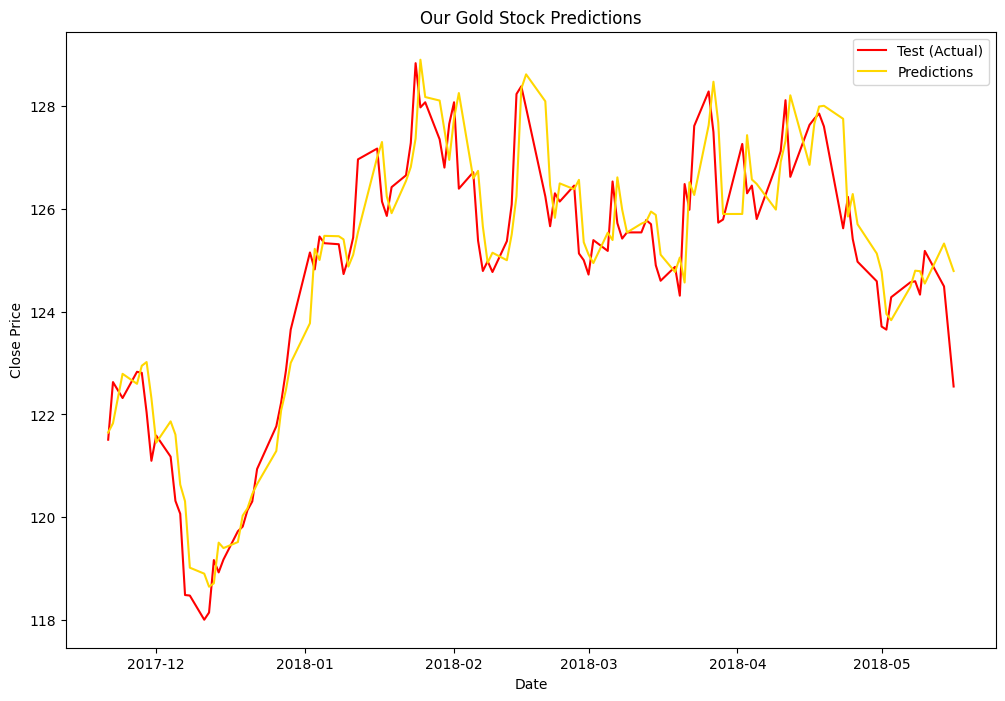

In [69]:
plt.figure(figsize=(12,8))
plt.plot(test['Date'], test['GLD'], label="Test (Actual)", color='red')
plt.plot(test['Date'], test['Predictions'], label="Predictions", color='gold')
plt.title("Our Gold Stock Predictions")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.show()

In [70]:
# Flatten arrays
y_true = y_test.reshape(-1)
y_pred = predictions.reshape(-1)

# Metrics
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
r2 = r2_score(y_true, y_pred)
pearson_corr, _ = pearsonr(y_true, y_pred)

print("MAE:", mae)
print("RMSE:", rmse)
print("R2 Score:", r2)
print("Pearson Correlation:", pearson_corr)

MAE: 0.6473401644222869
RMSE: 0.8347912061516499
R2 Score: 0.8982861886001529
Pearson Correlation: 0.9507255602976111


In [71]:
mape = np.mean(np.abs((y_true - y_pred)/y_true)) * 100
print("MAPE (%): ", mape)

MAPE (%):  0.5181937674332978


In [74]:
spearman, _ = spearmanr(y_true, y_pred)
print("Spearman Rank Correlation: ", spearman)

Spearman Rank Correlation:  0.9030907125903161


In [77]:
### Save the trained model
import joblib
joblib.dump(model, "/workspaces/Gold-Price-Prediction/Version 2/gold_prediction_model.pkl")

['/workspaces/Gold-Price-Prediction/Version 2/gold_prediction_model.pkl']